In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew

In [2]:
pd.set_option('display.max_columns', 100)


In [3]:
train = pd.read_csv("G:/Big Data Stuffs/dataset/house_price/train.csv")
test = pd.read_csv("G:/Big Data Stuffs/dataset/house_price/test.csv")

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
column_list = train.columns
print column_list

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea', u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities', u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1', u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual', u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle', u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType', u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1', u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF', u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath', u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr', u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional', u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt', u'GarageFinish', u'GarageCars', u'GarageArea', u'GarageQual', u'GarageCond', u'PavedDrive', u'WoodDeckSF', u'OpenP

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
print("Statistical Analysis of SalePrice of the train set")
print train['SalePrice'].describe()

Statistical Analysis of SalePrice of the train set
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


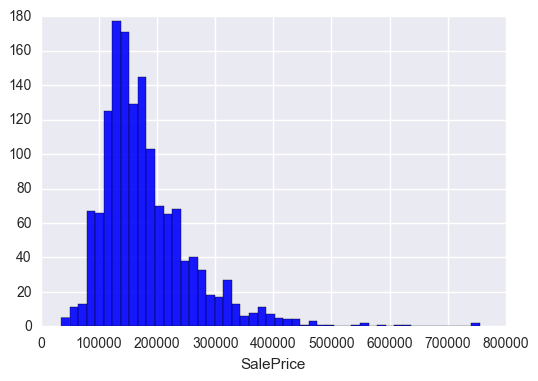

In [9]:
sns.distplot(train['SalePrice'],kde = False, color = 'b', hist_kws={'alpha': 0.9})

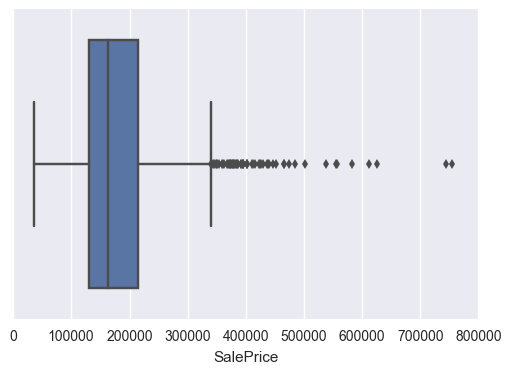

In [10]:
sns.boxplot(train['SalePrice'])

# Numerical Features

C:\Users\Zeeshan\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


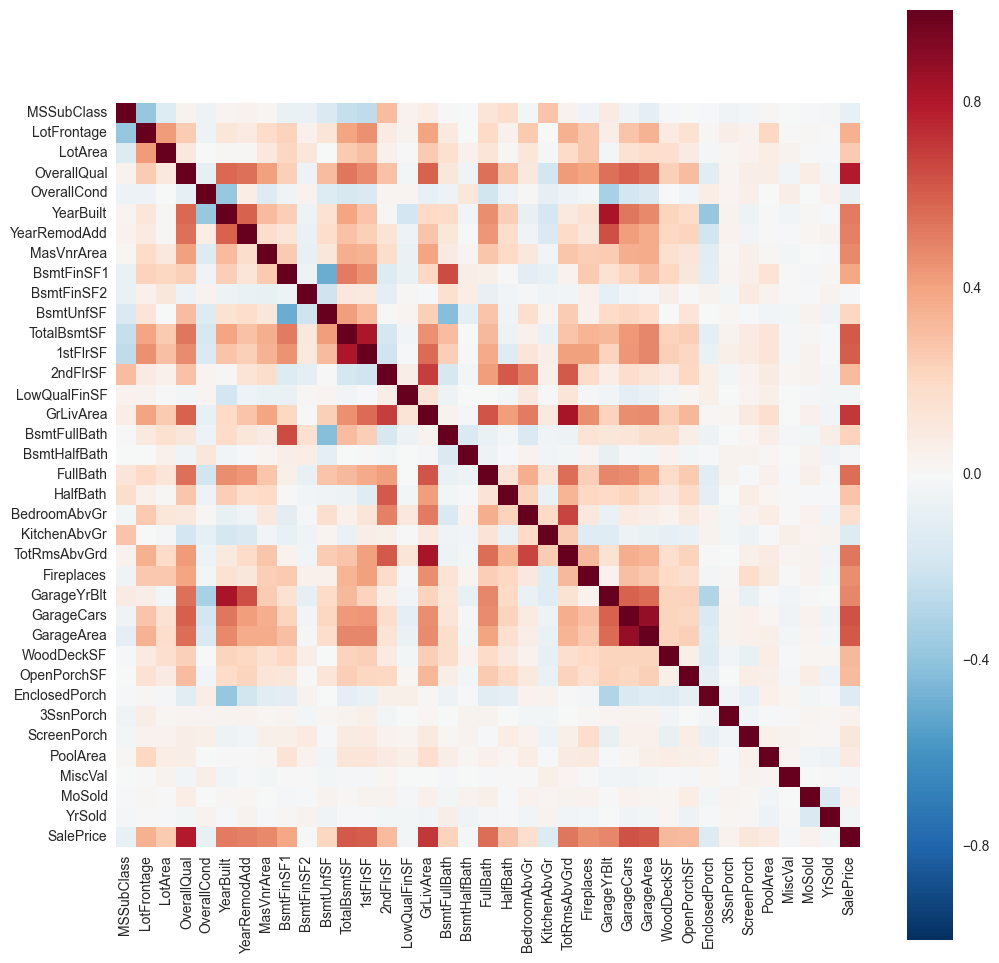

In [11]:
corr = train.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)

In [12]:
cor_dict = corr['SalePrice'].to_dict()
del cor_dict['SalePrice']
print("List the numerical features decendingly by their correlation with Sale Price:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))

List the numerical features decendingly by their correlation with Sale Price:

OverallQual: 	0.790981600584
GrLivArea: 	0.708624477613
GarageCars: 	0.640409197258
GarageArea: 	0.623431438918
TotalBsmtSF: 	0.613580551559
1stFlrSF: 	0.605852184692
FullBath: 	0.560663762748
TotRmsAbvGrd: 	0.533723155582
YearBuilt: 	0.522897332879
YearRemodAdd: 	0.507100967111
GarageYrBlt: 	0.486361677488
MasVnrArea: 	0.477493047096
Fireplaces: 	0.466928836752
BsmtFinSF1: 	0.386419806242
LotFrontage: 	0.351799096571
WoodDeckSF: 	0.324413444568
2ndFlrSF: 	0.319333802832
OpenPorchSF: 	0.315856227116
HalfBath: 	0.284107675595
LotArea: 	0.263843353871
BsmtFullBath: 	0.227122233131
BsmtUnfSF: 	0.214479105547
BedroomAbvGr: 	0.168213154301
KitchenAbvGr: 	-0.135907370842
EnclosedPorch: 	-0.128577957926
ScreenPorch: 	0.111446571143
PoolArea: 	0.0924035494919
MSSubClass: 	-0.0842841351266
OverallCond: 	-0.0778558940487
MoSold: 	0.0464322452238
3SsnPorch: 	0.0445836653357
YrSold: 	-0.0289225851687
LowQualFinSF: 	-0.0

The housing price correlates strongly with OverallQual, GrLivArea(GarageCars), GargeArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt, YearRemodAdd, GargeYrBlt, MasVnrArea and Fireplaces. But some of those features are highly correlated among each others.

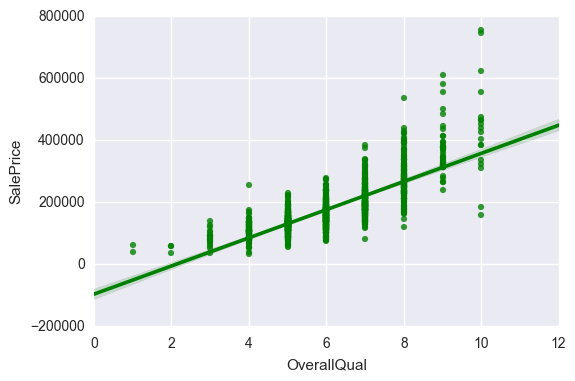

In [13]:
sns.regplot(x = 'OverallQual', y = 'SalePrice', data = train, color = 'Green')

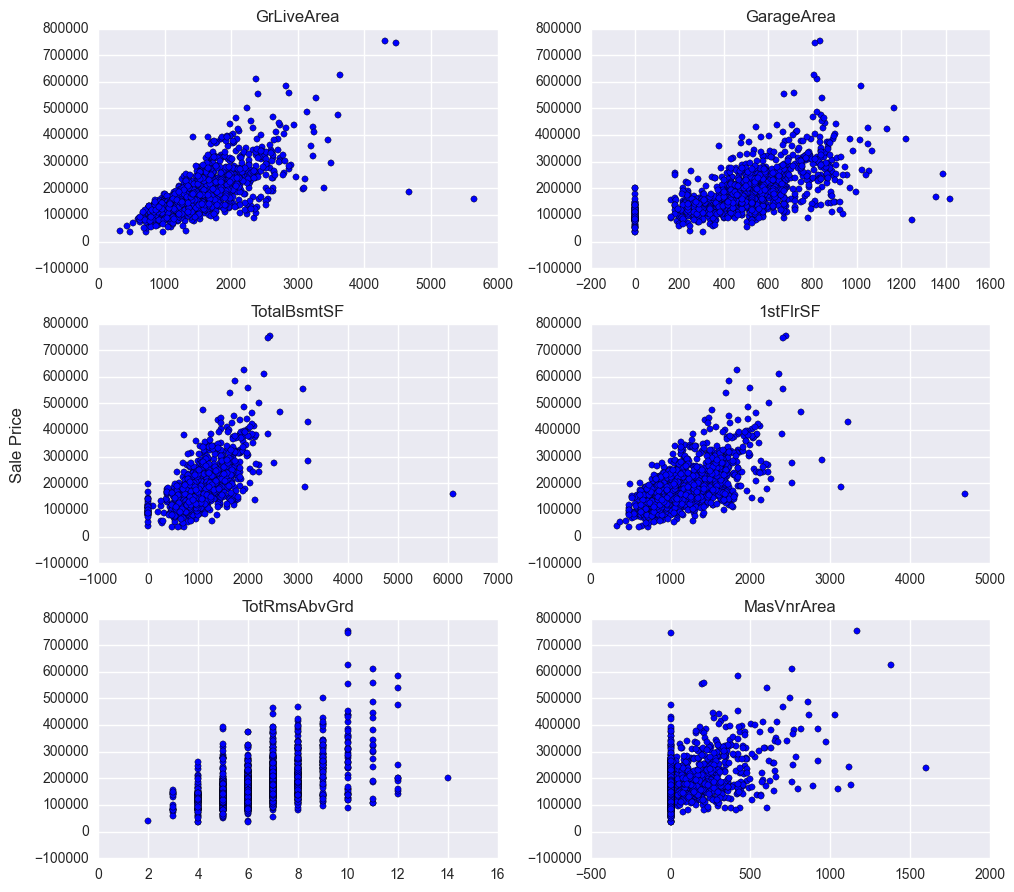

In [14]:
plt.figure(1)
f, axarr = plt.subplots(3, 2, figsize=(10, 9))
price = train.SalePrice.values
axarr[0, 0].scatter(train.GrLivArea.values, price)
axarr[0, 0].set_title('GrLiveArea')
axarr[0, 1].scatter(train.GarageArea.values, price)
axarr[0, 1].set_title('GarageArea')
axarr[1, 0].scatter(train.TotalBsmtSF.values, price)
axarr[1, 0].set_title('TotalBsmtSF')
axarr[1, 1].scatter(train['1stFlrSF'].values, price)
axarr[1, 1].set_title('1stFlrSF')
axarr[2, 0].scatter(train.TotRmsAbvGrd.values, price)
axarr[2, 0].set_title('TotRmsAbvGrd')
axarr[2, 1].scatter(train.MasVnrArea.values, price)
axarr[2, 1].set_title('MasVnrArea')
f.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

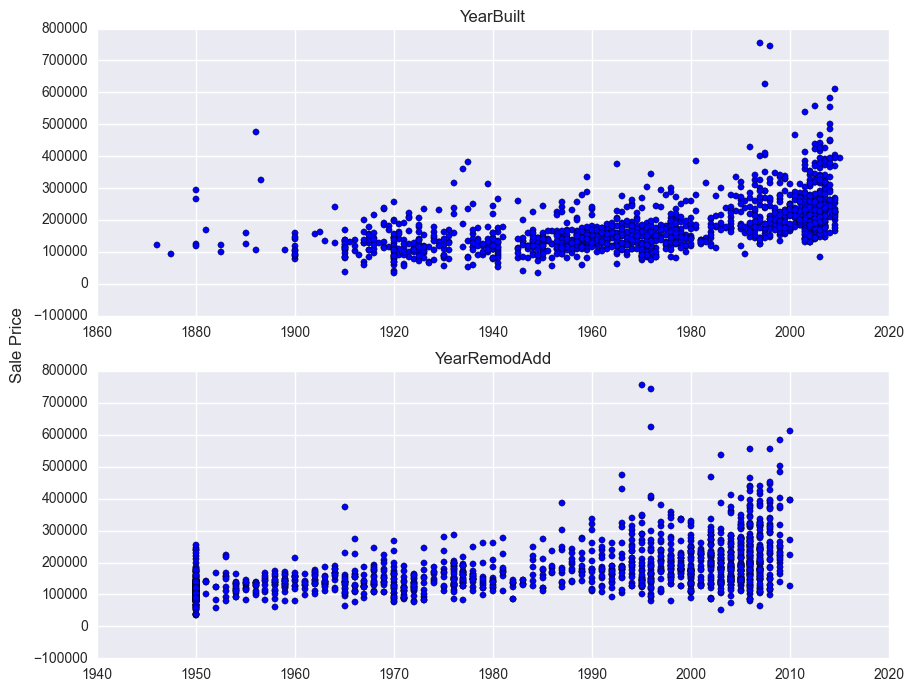

In [15]:
fig = plt.figure(2, figsize=(9, 7))
plt.subplot(211)
plt.scatter(train.YearBuilt.values, price)
plt.title('YearBuilt')

plt.subplot(212)
plt.scatter(train.YearRemodAdd.values, price)
plt.title('YearRemodAdd')

fig.text(-0.01, 0.5, 'Sale Price', va = 'center', rotation = 'vertical', fontsize = 12)

plt.tight_layout()

# Categorical Features

In [16]:
print("List os Categorical features are ") 
print(train.select_dtypes(include=['object']).columns.values)

List os Categorical features are 
['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Heating' 'HeatingQC'
 'CentralAir' 'Electrical' 'KitchenQual' 'Functional' 'FireplaceQu'
 'GarageType' 'GarageFinish' 'GarageQual' 'GarageCond' 'PavedDrive'
 'PoolQC' 'Fence' 'MiscFeature' 'SaleType' 'SaleCondition']


Neighbourhood

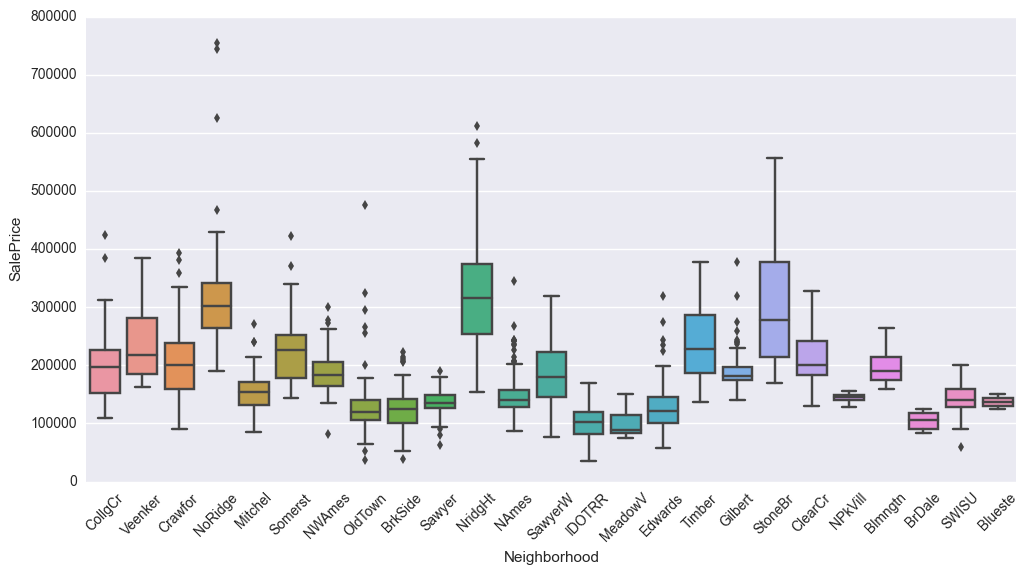

In [17]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice',  data = train)
xt = plt.xticks(rotation=45)

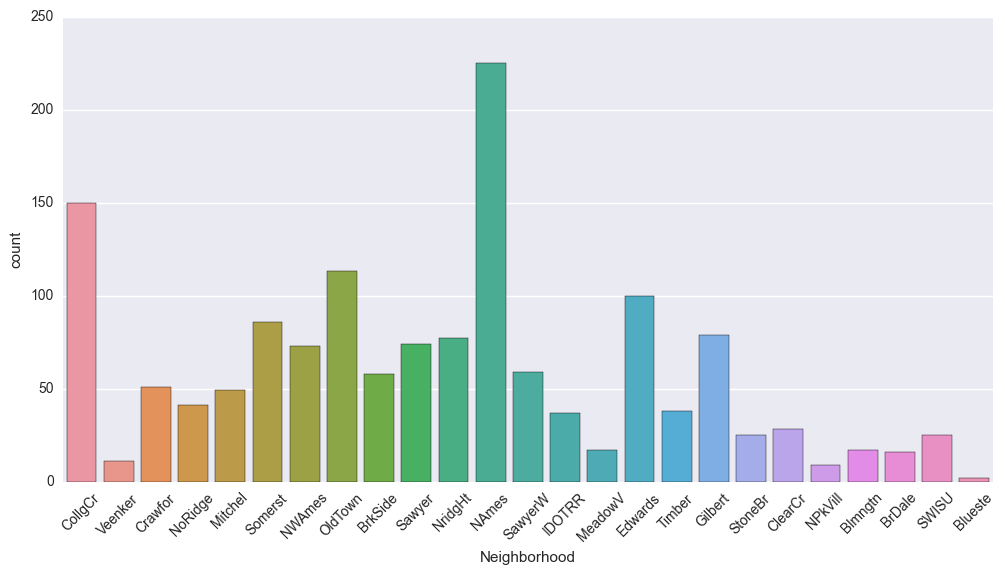

In [18]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Neighborhood', data = train)
xt = plt.xticks(rotation=45)

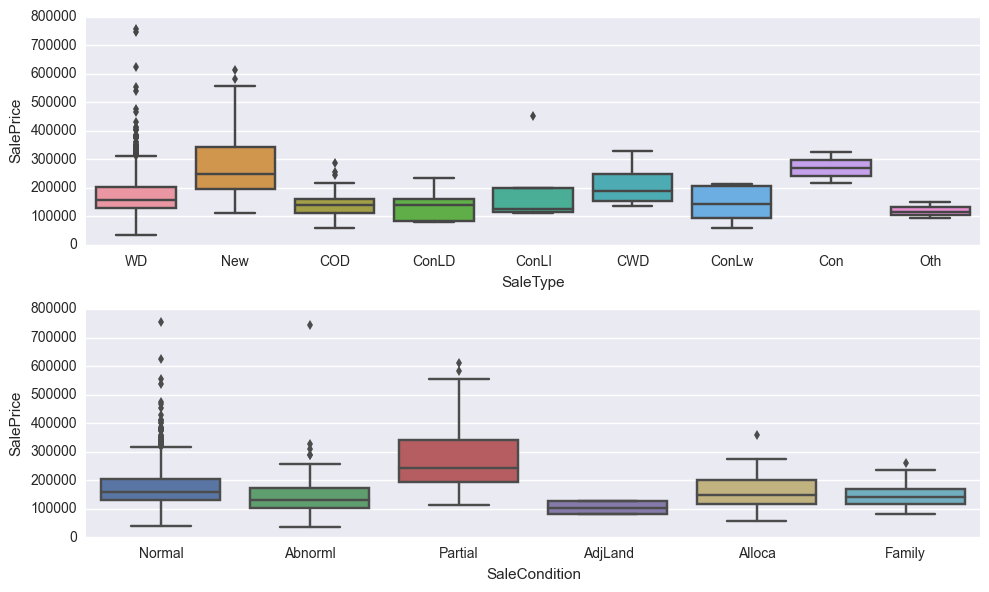

In [19]:
fig, ax = plt.subplots(2, 1, figsize = (10, 6))
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = train, ax = ax[0])
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = train, ax = ax[1])
plt.tight_layout()

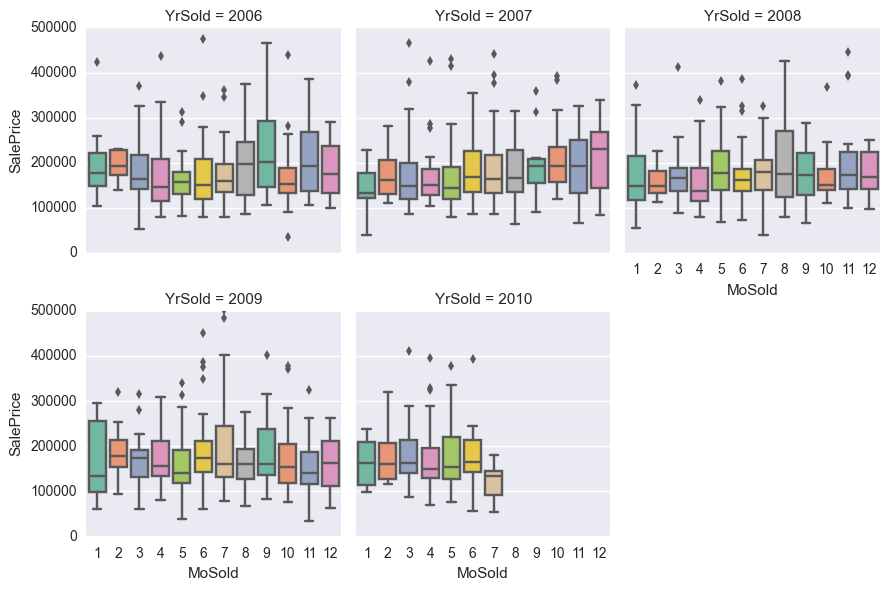

In [20]:
g = sns.FacetGrid(train, col = 'YrSold', col_wrap = 3)
g.map(sns.boxplot, 'MoSold', 'SalePrice', palette='Set2', order = range(1, 13))\
.set(ylim = (0, 500000))
plt.tight_layout()

Sale's timing does not seem to hugely affect the house.

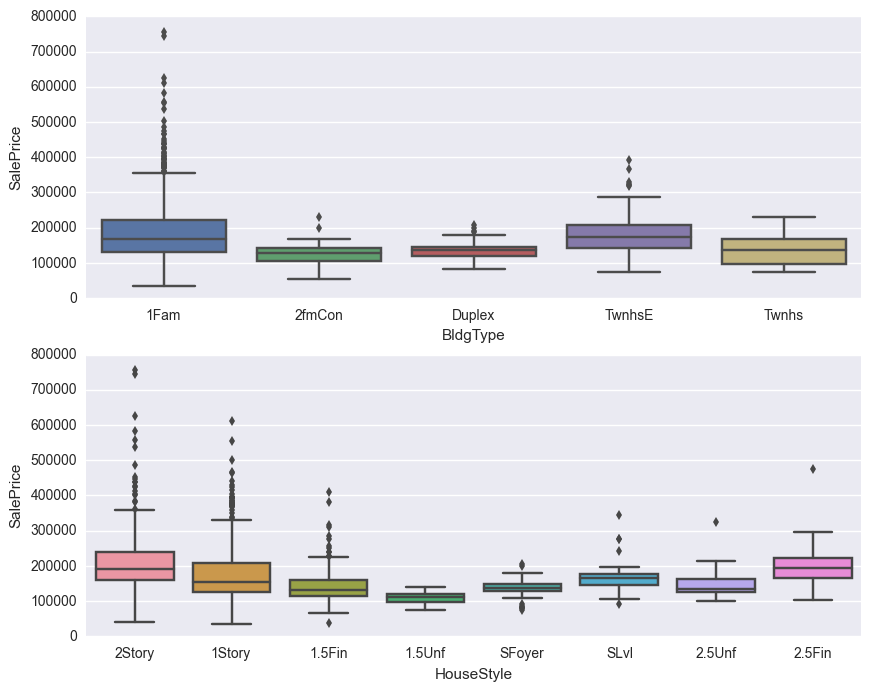

In [21]:
fig, ax = plt.subplots(2, 1, figsize = (10, 8))
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = train, ax = ax[0])
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = train, ax = ax[1])

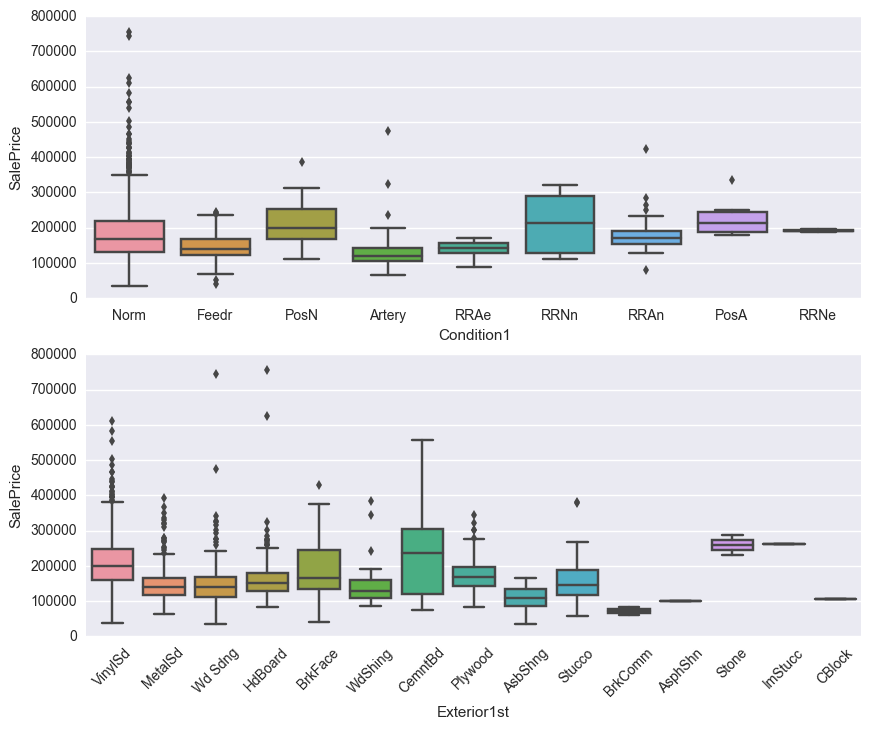

In [22]:
fig, ax = plt.subplots(2, 1, figsize = (10, 8))
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = train, ax = ax[0])
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = train, ax = ax[1])
x = plt.xticks(rotation = 45)
plt.show()

Basement Conditions

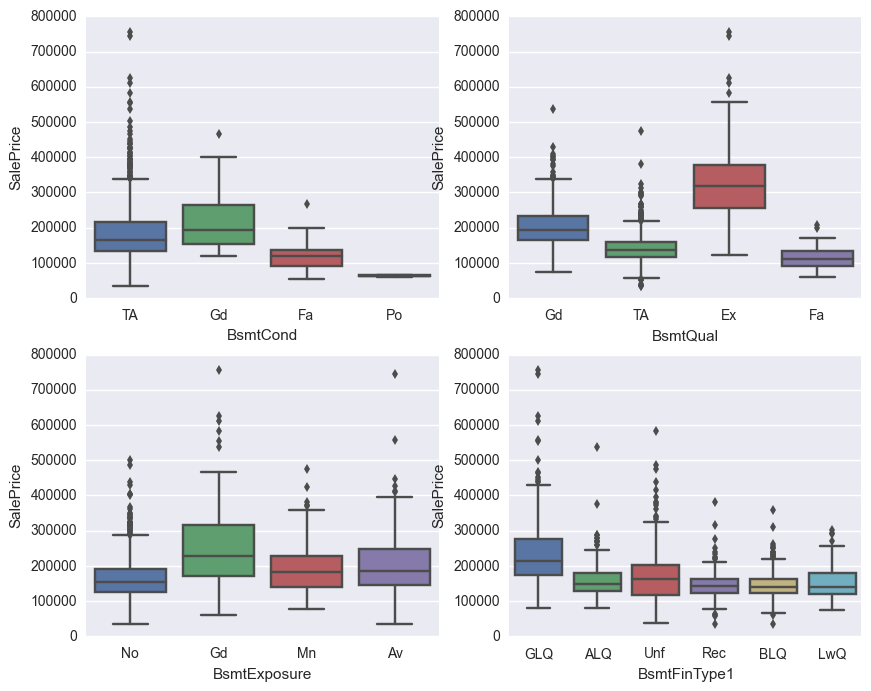

In [23]:
fig, ax = plt.subplots(2, 2, figsize = (10, 8))
sns.boxplot('BsmtCond', 'SalePrice', data = train, ax = ax[0, 0])
sns.boxplot('BsmtQual', 'SalePrice', data = train, ax = ax[0, 1])
sns.boxplot('BsmtExposure', 'SalePrice', data = train, ax = ax[1, 0])
sns.boxplot('BsmtFinType1', 'SalePrice', data = train, ax = ax[1, 1])

Home Functionality

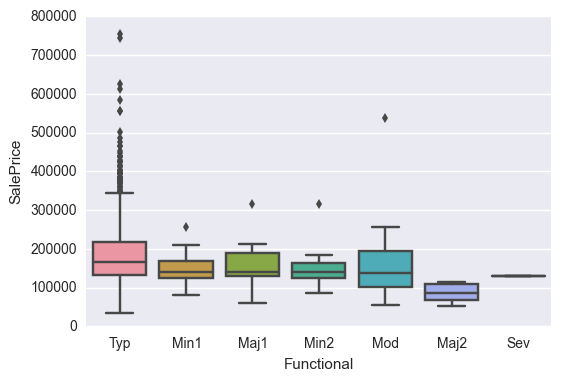

In [24]:
sns.boxplot(x='Functional',y='SalePrice', data = train)

FirePlaceQu

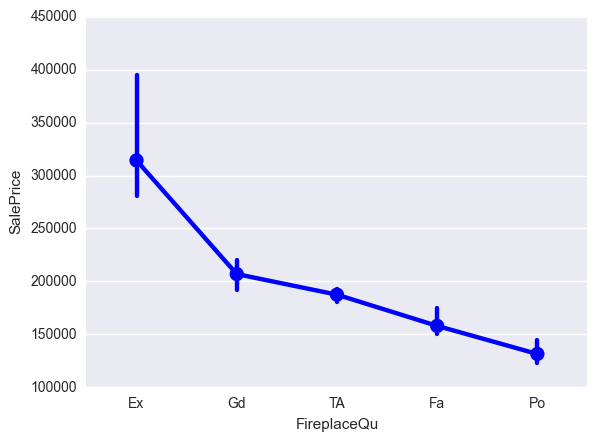

In [25]:
sns.factorplot('FireplaceQu', 'SalePrice', data = train , color = 'b', \
               estimator = np.median, order = ['Ex', 'Gd', 'TA', 'Fa', 'Po'], size = 4.5,  aspect=1.35)

In [26]:
pd.crosstab(train.Fireplaces, train.FireplaceQu)

FireplaceQu,Ex,Fa,Gd,Po,TA
Fireplaces,,,,,
1,19,28,324,20,259
2,4,4,54,0,53
3,1,1,2,0,1


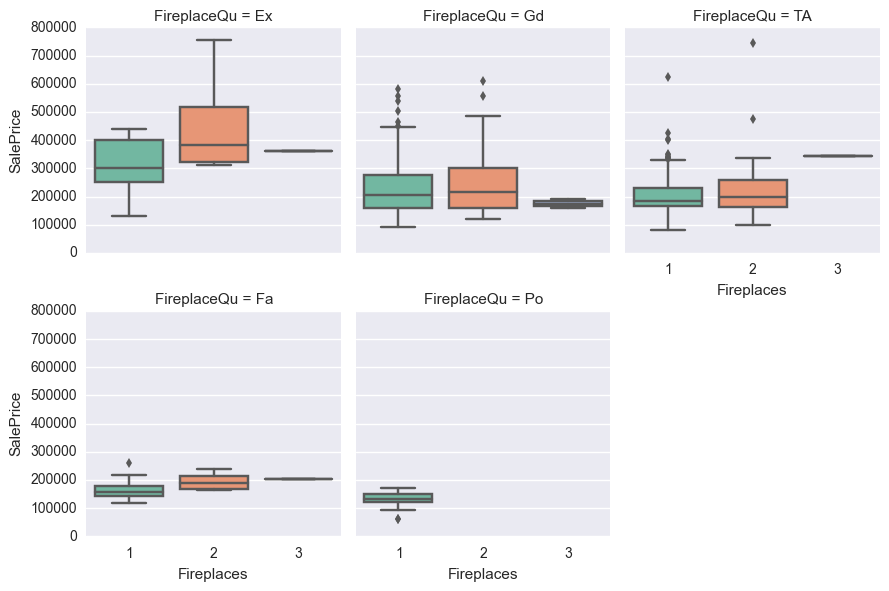

In [27]:
g = sns.FacetGrid(train, col = 'FireplaceQu', col_wrap = 3, col_order=['Ex', 'Gd', 'TA', 'Fa', 'Po'])
g.map(sns.boxplot, 'Fireplaces', 'SalePrice', order = [1, 2, 3], palette = 'Set2')

Street & Alley Access

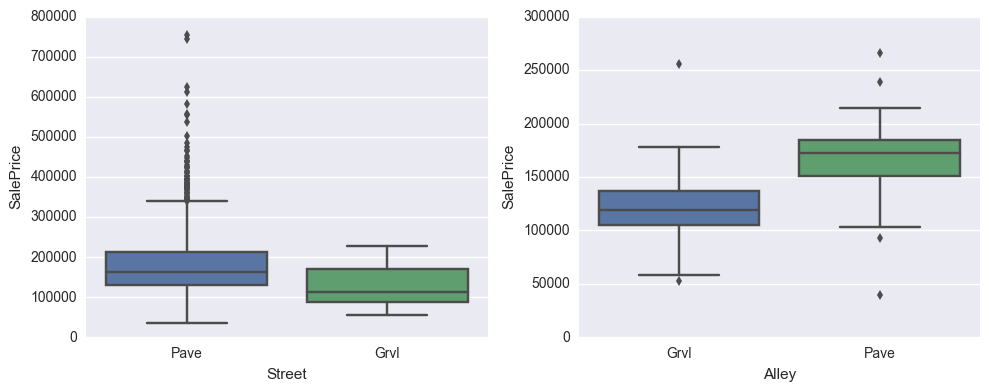

In [28]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
sns.boxplot(x = 'Street', y = 'SalePrice', data = train, ax = ax[0])
sns.boxplot(x = 'Alley', y = 'SalePrice', data = train, ax = ax[1])
plt.tight_layout()

MSZonig

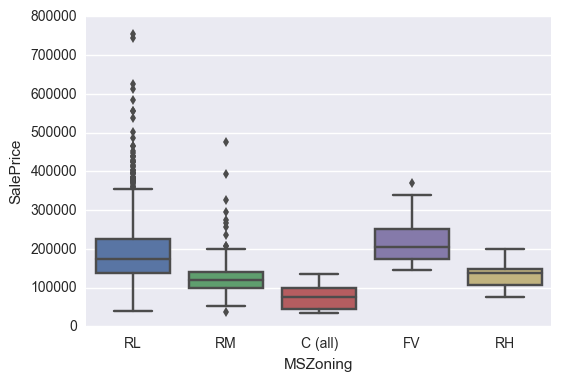

In [29]:
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = train)

Kitchen Quality

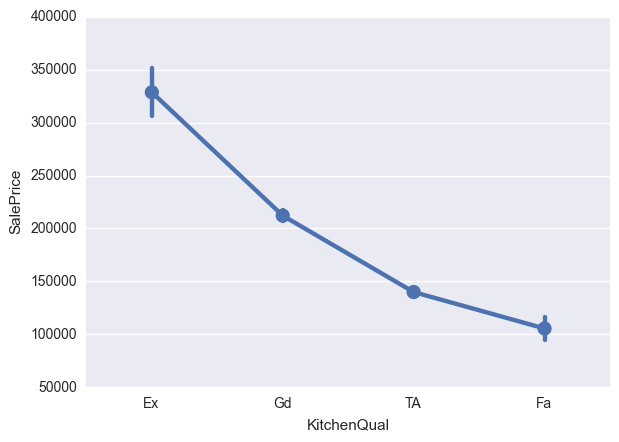

In [30]:
sns.factorplot('KitchenQual', 'SalePrice', estimator = np.mean, 
               size = 4.5, aspect = 1.4, data = train, order = ['Ex', 'Gd', 'TA', 'Fa'])

# Combining the features of Train and Test Dataset

In [31]:
all_features = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],test.loc[:,'MSSubClass':'SaleCondition']))

In [32]:
all_features.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [33]:
target = np.log(train['SalePrice'])
target_2 = train['SalePrice']

# Detecting outliers

In [34]:
def is_outlier(points, threshold = 3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > threshold

# Filling NA values

In [35]:
numeric_feats = all_features.dtypes[all_features.dtypes != "object"].index
for i in numeric_feats:
    median = np.nanmedian(all_features[i])
    outliers = np.where(is_outlier(all_features[i]))
    all_features[i].iloc[outliers] = median

C:\Users\Zeeshan\Anaconda\lib\site-packages\pandas\core\indexing.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Zeeshan\Anaconda\lib\site-packages\numpy\lib\function_base.py:3567: RuntimeWarning: Invalid value encountered in median for 1 results
  RuntimeWarning)
C:\Users\Zeeshan\Anaconda\lib\site-packages\numpy\lib\function_base.py:3558: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


In [36]:
skewed_feats = all_features[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

print(skewed_feats)

Index([u'MSSubClass', u'LotFrontage', u'MasVnrArea', u'BsmtFinSF1', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'BsmtHalfBath', u'OpenPorchSF'], dtype='object')


In [37]:
all_features[skewed_feats] = np.log1p(all_features[skewed_feats])

In [38]:
for i in all_features.columns:
    if sum(all_features[i].isnull())>0:
        s = "Feature: "+ str(i) + " has "+ str(sum(all_features[i].isnull()))+" null-values"
        print s

Feature: MSZoning has 4 null-values
Feature: LotFrontage has 486 null-values
Feature: Alley has 2721 null-values
Feature: Utilities has 2 null-values
Feature: Exterior1st has 1 null-values
Feature: Exterior2nd has 1 null-values
Feature: MasVnrType has 24 null-values
Feature: MasVnrArea has 23 null-values
Feature: BsmtQual has 81 null-values
Feature: BsmtCond has 82 null-values
Feature: BsmtExposure has 82 null-values
Feature: BsmtFinType1 has 79 null-values
Feature: BsmtFinSF1 has 1 null-values
Feature: BsmtFinType2 has 80 null-values
Feature: BsmtFinSF2 has 1 null-values
Feature: BsmtUnfSF has 1 null-values
Feature: TotalBsmtSF has 1 null-values
Feature: Electrical has 1 null-values
Feature: BsmtFullBath has 2 null-values
Feature: BsmtHalfBath has 2 null-values
Feature: KitchenQual has 1 null-values
Feature: Functional has 2 null-values
Feature: FireplaceQu has 1420 null-values
Feature: GarageType has 157 null-values
Feature: GarageYrBlt has 159 null-values
Feature: GarageFinish has 1

In [39]:
all_features['MSZoning'].fillna('RL',inplace=True)
all_features['BsmtQual'].fillna('TA',inplace=True)
all_features['BsmtCond'].fillna('TA',inplace=True)
all_features['MasVnrType'].fillna('None',inplace=True)
all_features['FireplaceQu'].fillna('Gd',inplace=True)
all_features['BsmtExposure'].fillna('No',inplace=True)
all_features['BsmtFinType1'].fillna('Unf',inplace=True)
all_features['BsmtFinType2'].fillna('Unf',inplace=True)
all_features['Electrical'].fillna('SBrkr',inplace=True)
all_features['GarageFinish'].fillna('Unf',inplace=True)
all_features['GarageCond'].fillna('TA',inplace=True)
all_features['GarageQual'].fillna('TA',inplace=True)
all_features['SaleType'].fillna('WD',inplace=True)
all_features['GarageType'].fillna('Attchd',inplace=True)
all_features['KitchenQual'].fillna('TA',inplace=True)
all_features['Functional'].fillna('Typ',inplace=True)
all_features['Exterior1st'].fillna('VinylSd',inplace=True)
all_features['Exterior2nd'].fillna('VinylSd',inplace=True)
all_features['Alley'].fillna('Grvl',inplace=True)
all_features['PoolQC'].fillna('Gd',inplace=True)
all_features['Fence'].fillna('MnPrv',inplace=True)
all_features['MiscFeature'].fillna('Shed',inplace=True)
all_features['Utilities'].fillna('AllPub',inplace=True)

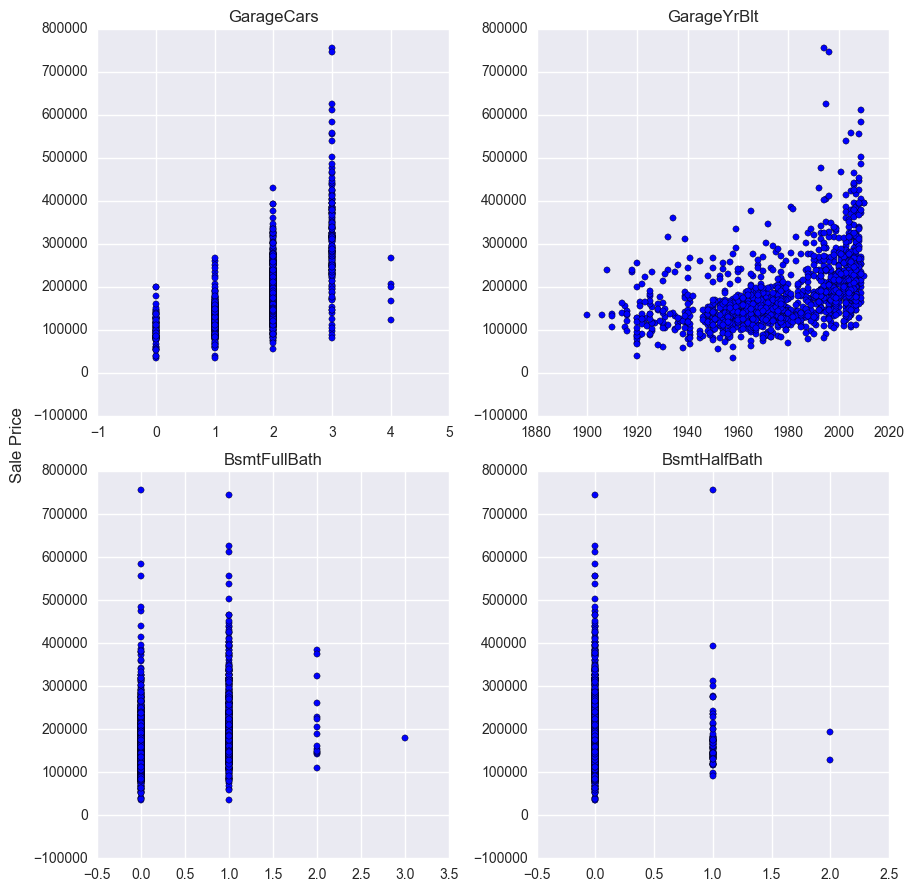

In [40]:
plt.figure(1)
f, axarr = plt.subplots(2, 2, figsize=(9, 9))
price = train.SalePrice.values
axarr[0, 0].scatter(train.GarageCars.values, price)
axarr[0, 0].set_title('GarageCars')
axarr[0, 1].scatter(train.GarageYrBlt.values, price)
axarr[0, 1].set_title('GarageYrBlt')
axarr[1, 0].scatter(train.BsmtFullBath.values, price)
axarr[1, 0].set_title('BsmtFullBath')
axarr[1, 1].scatter(train.BsmtHalfBath.values, price)
axarr[1, 1].set_title('BsmtHalfBath')
f.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

In [41]:
all_features['GarageCars'].fillna(np.nanmedian(all_features['GarageCars']),inplace=True)
all_features['GarageYrBlt'].fillna(np.nanmedian(all_features['GarageYrBlt']),inplace=True)
all_features['BsmtFullBath'].fillna(np.nanmedian(all_features['BsmtFullBath']),inplace=True)
all_features['BsmtHalfBath'].fillna(np.nanmedian(all_features['BsmtHalfBath']),inplace=True)

In [42]:
for i in all_features.columns:
    if sum(all_features[i].isnull())>0:
        all_features[i].fillna(np.nanmean(all_features[i]),inplace=True)

# Label Encoding of Categorical Variable

In [43]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [44]:
category = all_features.select_dtypes(include=['object']).columns

In [45]:
category

Index([u'MSZoning', u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities', u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1', u'Condition2', u'BldgType', u'HouseStyle', u'RoofStyle', u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinType2', u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'KitchenQual', u'Functional', u'FireplaceQu', u'GarageType', u'GarageFinish', u'GarageQual', u'GarageCond', u'PavedDrive', u'PoolQC', u'Fence', u'MiscFeature', u'SaleType', u'SaleCondition'], dtype='object')

In [46]:
for i in category:
    all_features.ix[:,i]=le.fit_transform(all_features.ix[:,i])

In [47]:
all_features.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,4.110874,3,4.189655,8450,1,0,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,5.283204,2,4,2,2,3,3,2,6.561031,5,0,5.017280,6.753438,1,0,1,4,856,0,0,1710,1,0.000000,2,0,3,1,2,8,6,0,2,1,2003,1,2,548,4,4,2,0,4.127134,0,0,0,0,2,2,2,0,2,2008,8,4
1,3.044522,3,4.394449,9600,1,0,3,3,0,2,0,24,1,2,0,2,6,5,1976,1976,1,1,8,8,2,0.000000,3,4,1,2,3,1,0,6.886532,5,0,5.652489,7.141245,1,0,1,4,1262,0,0,1262,0,0.693147,2,0,3,1,3,6,6,1,4,1,1976,1,2,460,4,4,2,0,0.000000,0,0,0,0,2,2,2,0,5,2007,8,4
2,4.110874,3,4.234107,11250,1,0,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,5.093750,2,4,2,2,3,2,2,6.188264,5,0,6.075346,6.825460,1,0,1,4,920,0,0,1786,1,0.000000,2,0,3,1,2,6,6,1,4,1,2001,1,2,608,4,4,2,0,3.761200,0,0,0,0,2,2,2,0,9,2008,8,4
3,4.262680,3,4.110874,9550,1,0,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.000000,3,4,0,3,1,3,0,5.379897,5,0,6.293419,6.629363,1,2,1,4,961,0,0,1717,1,0.000000,2,0,3,1,2,7,6,1,2,5,1998,2,3,642,4,4,2,0,3.583519,0,0,0,0,2,2,2,0,2,2006,8,0
4,4.110874,3,4.442651,14260,1,0,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,5.860786,2,4,2,2,3,0,2,6.486161,5,0,6.196444,7.044033,1,0,1,4,1145,0,0,2198,1,0.000000,2,0,3,1,2,9,6,1,4,1,2000,1,3,836,4,4,2,0,4.442651,0,0,0,0,2,2,2,0,12,2008,8,4


# Feature Selection using Random Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [49]:
rf_features = all_features[:train.shape[0]]
rf.fit(rf_features,target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [50]:
print "Features sorted by their score:"
print sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_),rf_features.columns), reverse=True)

Features sorted by their score:
[(0.5472, 'OverallQual'), (0.1226, 'GrLivArea'), (0.0458, 'TotalBsmtSF'), (0.0386, 'GarageCars'), (0.0284, '1stFlrSF'), (0.022, 'YearBuilt'), (0.0219, 'BsmtFinSF1'), (0.0187, 'GarageArea'), (0.0144, 'LotArea'), (0.0118, 'YearRemodAdd'), (0.0087, 'Neighborhood'), (0.0079, 'MSZoning'), (0.0079, 'BsmtFinType1'), (0.0076, 'Fireplaces'), (0.0072, 'GarageFinish'), (0.0067, 'CentralAir'), (0.0066, 'GarageYrBlt'), (0.0062, 'BsmtUnfSF'), (0.0058, 'LotFrontage'), (0.0055, 'GarageType'), (0.0044, 'MoSold'), (0.0041, 'BsmtQual'), (0.0036, 'OpenPorchSF'), (0.0035, 'MasVnrArea'), (0.0034, 'Exterior2nd'), (0.0026, 'Exterior1st'), (0.0023, 'TotRmsAbvGrd'), (0.002, 'SaleCondition'), (0.002, 'BsmtExposure'), (0.0018, 'MSSubClass'), (0.0017, 'YrSold'), (0.0017, 'ExterCond'), (0.0016, 'HeatingQC'), (0.0015, 'BsmtFinType2'), (0.0015, 'BldgType'), (0.0014, 'PavedDrive'), (0.0014, 'LandSlope'), (0.0014, 'HouseStyle'), (0.0014, 'ExterQual'), (0.0014, 'Alley'), (0.0011, 'LotShap

In [51]:
excl = ['RoofStyle','PoolArea','GarageQual',
        'BsmtHalfBath','RoofMatl','LowQualFinSF',
        'Condition1','BsmtFinSF2','BsmtCond',
        'MiscVal','Heating','GarageCond',
        'Condition2','Street','3SsnPorch',
        'Alley','PoolQC','Fence',
        'MiscFeature','Utilities']

In [52]:
for i in excl:
    del all_features[i]

In [53]:
X_train = all_features[:train.shape[0]]
X_test = all_features[train.shape[0]:]

In [54]:
import xgboost as xgb
import graphlab as gl
from sklearn.model_selection import cross_val_predict

# Gradient Boosting Tree Regression using GraphLab

In [55]:
dtrain = gl.SFrame(X_train)
dtest = gl.SFrame(X_test)

This non-commercial license of GraphLab Create for academic use is assigned to zeeshan.bdamp06160320@spjain.org and will expire on October 22, 2017.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\Zeeshan\AppData\Local\Temp\graphlab_server_1483704415.log.0


In [56]:
dtrain.add_column(gl.SArray(target)).print_rows(num_rows=5, num_columns=60);

+---------------+----------+---------------+---------+----------+-------------+
|   MSSubClass  | MSZoning |  LotFrontage  | LotArea | LotShape | LandContour |
+---------------+----------+---------------+---------+----------+-------------+
| 4.11087386417 |    3     | 4.18965474203 |  8450.0 |    3     |      3      |
| 3.04452243772 |    3     | 4.39444915467 |  9600.0 |    3     |      3      |
| 4.11087386417 |    3     |  4.2341065046 | 11250.0 |    0     |      3      |
| 4.26267987704 |    3     | 4.11087386417 |  9550.0 |    0     |      3      |
| 4.11087386417 |    3     | 4.44265125649 | 14260.0 |    0     |      3      |
+---------------+----------+---------------+---------+----------+-------------+
+-----------+-----------+--------------+----------+------------+-------------+
| LotConfig | LandSlope | Neighborhood | BldgType | HouseStyle | OverallQual |
+-----------+-----------+--------------+----------+------------+-------------+
|     4     |     0     |      5       |   

In [57]:
gl_model = gl.boosted_trees_regression.create(dtrain,target='X60',max_iterations=60,
                                              validation_set='auto', max_depth=6, 
                                              step_size=0.3, min_loss_reduction=0.0,
                                              min_child_weight=0.1, row_subsample=0.8, 
                                              column_subsample=1.0, verbose=True, random_seed=None)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



WARNING: Detected extremely low variance for feature(s) 'OverallCond', '2ndFlrSF', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'WoodDeckSF', 'EnclosedPorch', 'ScreenPorch' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Boosted trees regression:

--------------------------------------------------------

Number of examples          : 1383

Number of features          : 59

Number of unpacked features : 59

+-----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 0.047003     | 9.577871           | 9.014938             | 8.078938      | 8.048320        |

| 2         | 0.104006     | 7.062715           | 6.499782             | 5.664635      | 5.653600        |

| 3         | 0.131008     | 5.312017           | 4.749084             | 3.973428      | 3.965815        |

| 4         | 0.142008     | 4.080097           | 3.517164             | 2.791832      | 2.802033        |

| 5         | 0.168010     | 3.142865           | 2.579932             | 1.962750      | 1.972227        |

| 6         | 0.273016     | 2.543009           | 1.988917             | 1.384100      | 1.394425        |

| 11        | 0.478028     | 0.910017           | 0.650572             | 0.270278      | 0.292062        |

| 50        | 1.573090     | 0.140571           | 0.513451             | 0.030046      | 0.139257        |

| 51        | 1.621093     | 0.140944           | 0.514939             | 0.029473      | 0.140027        |

+-----------+--------------+--------------------+----------------------+---------------+-----------------+

In [58]:
gl_model.show()

Canvas is accessible via web browser at the URL: http://localhost:57011/index.html
Opening Canvas in default web browser.


In [59]:
predictions_gl = np.exp(gl_model.predict(dtest))

In [60]:
predictions_gl.view()

array([ 128336.63752623,  159777.70310663,  182601.72858744, ...,
        148014.50230589,  125012.95814686,  224097.09778451])

# Random Forest Regression Model

In [61]:
from sklearn.ensemble import RandomForestRegressor
rf_regr = RandomForestRegressor(n_estimators=100, criterion='mse',
                                max_depth=6, min_samples_split=2, 
                                min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                max_features='auto', max_leaf_nodes=None, 
                                min_impurity_split=1e-07, bootstrap=True, 
                                oob_score=False, n_jobs=-1, random_state=None, 
                                verbose=0, warm_start=False)
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

C:\Users\Zeeshan\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [62]:
rf_regr.fit(X_train,target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [63]:
rf_pred_train = rf_regr.predict(X_train)
print("random forest regressor score on training set: ",np.sqrt(mean_squared_error(rf_pred_train,target)))

('random forest regressor score on training set: ', 0.1121369186881318)


In [64]:
rf_scores = cross_val_score(rf_regr,X_train,target)
print("The cross validation score for random forest regressor model is :",rf_scores.mean())

('The cross validation score for random forest regressor model is :', 0.84410264181426065)


In [65]:
pred_rf_regr = np.exp(rf_regr.predict(X_test))

# XGBoost Regressor Model

In [66]:
regr = xgb.XGBRegressor(
                 colsample_bytree=0.2,
                 gamma=0.0,
                 learning_rate=0.01,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=7200,                                                                  
                 reg_alpha=0.9,
                 reg_lambda=0.6,
                 subsample=0.2,
                 seed=42,
                 silent=1)

In [67]:
regr.fit(X_train,target)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.2,
       gamma=0.0, learning_rate=0.01, max_delta_step=0, max_depth=4,
       min_child_weight=1.5, missing=None, n_estimators=7200, nthread=-1,
       objective='reg:linear', reg_alpha=0.9, reg_lambda=0.6,
       scale_pos_weight=1, seed=42, silent=1, subsample=0.2)

In [68]:
regr_pred_train = regr.predict(X_train)
print("XGBoost score on training set: ",np.sqrt(mean_squared_error(regr_pred_train,target)))

('XGBoost score on training set: ', 0.082191807318812954)


In [69]:
xgb_cv_scores = cross_val_score(regr,X_train,target)
xgb_cv_scores.mean()

0.88659361774594003

In [70]:
pred_xgb = np.exp(regr.predict(X_test))

# Adaboost Regression 

In [71]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
rng = np.random.RandomState(1)

In [72]:
ada_regr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=6),
                          n_estimators=500, random_state=rng)

In [73]:
ada_regr.fit(X_train,target)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=500,
         random_state=<mtrand.RandomState object at 0x0000000015E16E58>)

In [74]:
ada_pred_train = ada_regr.predict(X_train)
print("Adaboost score on training set: ",np.sqrt(mean_squared_error(ada_pred_train,target)))

('Adaboost score on training set: ', 0.079286506130303289)


In [75]:
pred_ada = np.exp(ada_regr.predict(X_test))

In [76]:
scores = cross_val_score(ada_regr,X_train,target)
print("The cross validation score for Adaboost model is :",scores.mean())

('The cross validation score for Adaboost model is :', 0.85555027224403213)


# Lasso Regression Model

In [77]:
from sklearn.linear_model import Lasso
best_alpha = 0.00099
lasso_regr = Lasso(alpha=best_alpha, max_iter=50000)
lasso_regr.fit(X_train,target)

Lasso(alpha=0.00099, copy_X=True, fit_intercept=True, max_iter=50000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [78]:
lasso_pred_train = lasso_regr.predict(X_train)
print("Lasso score on training set: ",np.sqrt(mean_squared_error(lasso_pred_train,target)))

('Lasso score on training set: ', 0.13695928215644643)


In [79]:
lasso_cv_scores = cross_val_score(lasso_regr,X_train,target)
lasso_cv_scores.mean()

0.87047221727745594

In [80]:
pred_lasso = np.exp(lasso_regr.predict(X_test))

# Ridge  Regression Model

In [81]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import validation_curve
ridge_regr = Ridge(alpha=0.01)

In [82]:
ridge_regr.fit(X_train,target)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [83]:
ridge_pred_train = ridge_regr.predict(X_train)
print("Ridge score on training set: ",np.sqrt(mean_squared_error(ridge_pred_train,target)))

('Ridge score on training set: ', 0.13653918078192226)


In [84]:
print("Ridge score on training set: ",np.sqrt(mean_squared_error(0.3*regr_pred_train+0.7*lasso_pred_train,target)))

('Ridge score on training set: ', 0.11790679343372909)


In [85]:
ridge_cv_scores = cross_val_score(ridge_regr,X_train,target)
ridge_cv_scores.mean()

0.86978834505098723

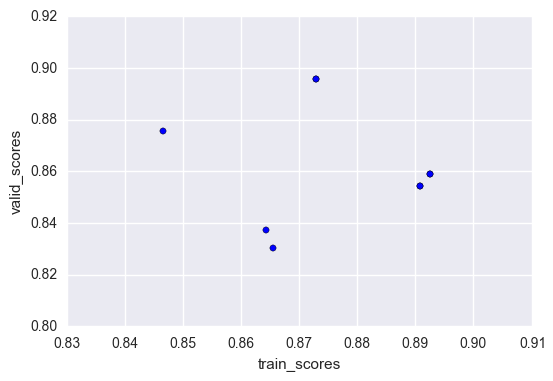

In [86]:
train_scores, valid_scores = validation_curve(Ridge(), X_train, target, "alpha",np.logspace(-7, 3, 3))
plt.scatter(train_scores, valid_scores)
plt.xlabel("train_scores")
plt.ylabel("valid_scores")

In [87]:
pred_ridge = np.exp(ridge_regr.predict(X_test))

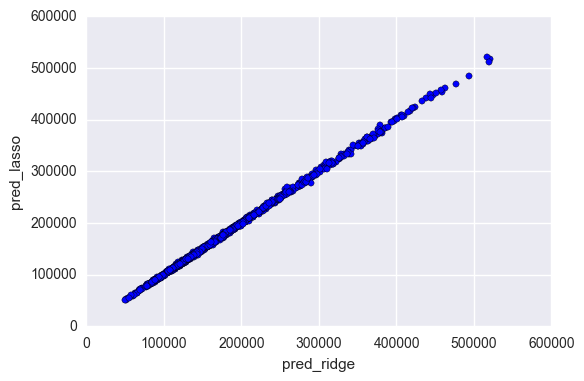

In [88]:
plt.scatter(pred_ridge,pred_lasso)
plt.xlabel("pred_ridge")
plt.ylabel("pred_lasso")

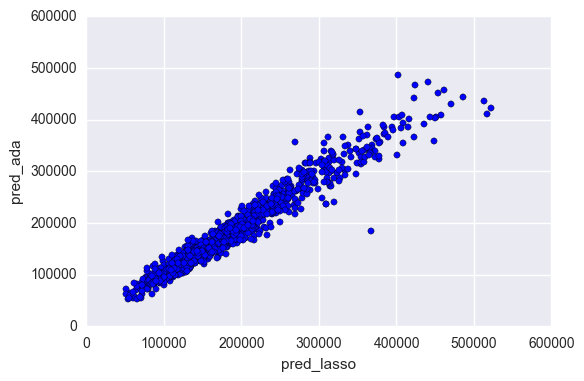

In [89]:
plt.scatter(pred_lasso,pred_ada)
plt.xlabel("pred_lasso")
plt.ylabel("pred_ada")

In [90]:
print("mean error between lasso prediction and adaBoost prediction: ",mean_squared_error(pred_lasso,pred_ada))

('mean error between lasso prediction and adaBoost prediction: ', 296548424.92105877)


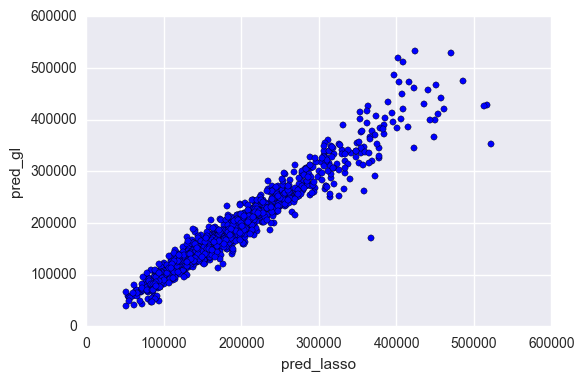

In [91]:
plt.scatter(pred_lasso,predictions_gl)
plt.xlabel("pred_lasso")
plt.ylabel("pred_gl")

In [92]:
print("mean error between lasso prediction and adaBoost prediction: ",mean_squared_error(pred_lasso,predictions_gl))

('mean error between lasso prediction and adaBoost prediction: ', 382386621.15183461)


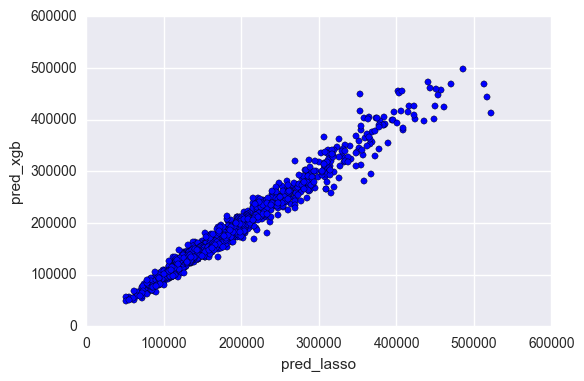

In [93]:
plt.scatter(pred_lasso,pred_xgb)
plt.xlabel("pred_lasso")
plt.ylabel("pred_xgb")

In [94]:
print("mean error between lasso prediction and xgboost regression prediction: ",mean_squared_error(pred_lasso,pred_xgb))

('mean error between lasso prediction and xgboost regression prediction: ', 169490127.26249385)


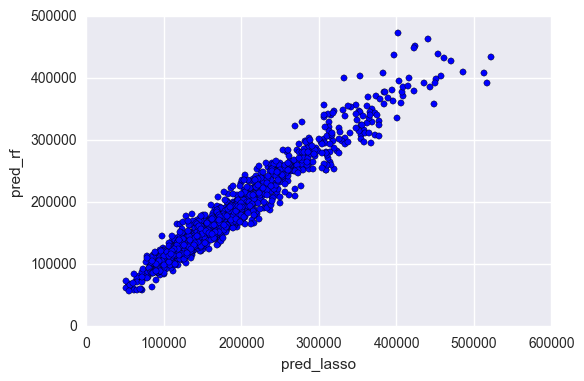

In [95]:
plt.scatter(pred_lasso,pred_rf_regr)
plt.xlabel("pred_lasso")
plt.ylabel("pred_rf")

In [96]:
print("mean error between lasso prediction and random forest regression prediction: ",mean_squared_error(pred_lasso,pred_rf_regr))

('mean error between lasso prediction and random forest regression prediction: ', 340104118.78173929)


In [97]:
final_pred = 0.3*pred_lasso+0.7*pred_xgb

In [98]:
final_solution = pd.DataFrame({"id":test.Id, "SalePrice":final_pred})
final_solution.to_csv("final_solution.csv", index = False)